In [1]:
!wget http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip

--2020-02-15 20:20:21--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Resolving www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connecting to www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘BX-CSV-Dump.zip’

BX-CSV-Dump.zip     100%[===================>]  24.88M  15.8MB/s    in 1.6s    

2020-02-15 20:20:23 (15.8 MB/s) - ‘BX-CSV-Dump.zip’ saved [26085508/26085508]



In [2]:
!unzip BX-CSV-Dump.zip

Archive:  BX-CSV-Dump.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [0]:
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [5]:
users

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [0]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [0]:
books_rated_by_users = ratings.merge(books,on="ISBN")

In [8]:
books_rated_by_users[books_rated_by_users.userID == 243]

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
503,243,0449006522,6,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...
6582,243,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
18558,243,0446605484,0,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,http://images.amazon.com/images/P/0446605484.0...,http://images.amazon.com/images/P/0446605484.0...,http://images.amazon.com/images/P/0446605484.0...
24367,243,0679450408,0,Silent Witness,Richard North Patterson,1997,Random House Inc,http://images.amazon.com/images/P/0679450408.0...,http://images.amazon.com/images/P/0679450408.0...,http://images.amazon.com/images/P/0679450408.0...
24482,243,0743486226,0,Angels &amp; Demons,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...
...,...,...,...,...,...,...,...,...,...,...
191032,243,0671042572,0,Jewel (Oprah's Book Club),Bret Lott,1999,Pocket,http://images.amazon.com/images/P/0671042572.0...,http://images.amazon.com/images/P/0671042572.0...,http://images.amazon.com/images/P/0671042572.0...
191158,243,0684848783,0,Tis : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684848783.0...,http://images.amazon.com/images/P/0684848783.0...,http://images.amazon.com/images/P/0684848783.0...
191332,243,0786863986,5,A Monk Swimming,Malachy McCourt,1998,Hyperion,http://images.amazon.com/images/P/0786863986.0...,http://images.amazon.com/images/P/0786863986.0...,http://images.amazon.com/images/P/0786863986.0...
191366,243,0803251718,5,Crazy Horse,Mari Sandoz,1961,University of Nebraska Press,http://images.amazon.com/images/P/0803251718.0...,http://images.amazon.com/images/P/0803251718.0...,http://images.amazon.com/images/P/0803251718.0...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


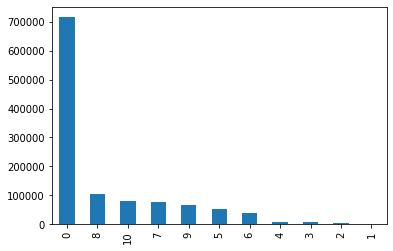

In [9]:
ratings.bookRating.value_counts().sort_values(ascending=False).plot("bar")

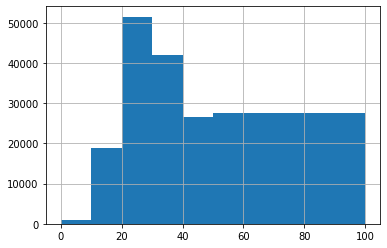

In [10]:
users.Age.hist(bins=[0,10,20,30,40,50,100])

# Based On Ratings

In [11]:
#Most Rated Books
pd.DataFrame(ratings.groupby("ISBN")['bookRating'].count()).sort_values(by="bookRating",ascending=False)

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
...,...
0801064090,1
0801064252,1
0801064279,1


# User Based Rating Correlation

In [12]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values(['ratingCount'], ascending=[False]).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [0]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 100].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [14]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(1847, 240478)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,9061002273,*0452281903,*0515128325,+0451197399,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 75280 122 8,0 85550 000 x,0 907 062 008,0*708880258,0.330241664,00000000,000000000,0000000000,00000000000,000000000000,0000000000000,0000000026307,0000000029841,0000000030670,0000000033220,0000000051,0000000124911,0000001042283,0000001056518,0000001481,0000018030,0000722105029,0000913154,...,O590418262,O590477412,O59052528X,O671004573,O67174142X,O753800055,O774037474,O77O428452,O786001690,O805063196,O856856428,O861366301,O880015152,O889950962,O9088446X,PS3569E84K5,Q380708353,Q912838027,ROO48580353,SBN67001026X,SELBSTVERLAG,T110105305048,T110105705048,TBR0385495641,THEALLTRUETRA,THECATASTROPH,THEFLYINGACE,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",Z380703475,ZR903CX0003,"\0432534220\""""","\2842053052\""""","\8887517452\""""","\8888809228\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
bones_ratings = ratings_pivot['0316666343']
print(books[books.ISBN == "0316666343"].bookTitle)
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
recommendations = corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

408    The Lovely Bones: A Novel
Name: bookTitle, dtype: object


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [16]:
recommendations.reset_index().merge(books,on="ISBN")

,ISBN,pearsonR,ratingCount,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0316666343,1.000000,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0446672211,0.411417,585,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
2,0312291639,0.390961,354,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
3,0446610038,0.361089,391,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
4,0060930535,0.348839,494,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
5,0316601950,0.336298,568,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
6,0345342968,0.322280,321,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
7,0385265700,0.315475,319,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
8,0060934417,0.282490,350,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
9,0671021001,0.263316,468,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...


# KNN item_based


In [17]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...


In [18]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [19]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,105


In [20]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   182491.000
mean         3.323
std          9.138
min          1.000
25%          1.000
50%          1.000
75%          3.000
max        617.000
Name: totalRatingCount, dtype: float64


In [21]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    6.000
0.910    6.000
0.920    7.000
0.930    8.000
0.940    9.000
0.950   10.000
0.960   12.000
0.970   16.000
0.980   22.000
0.990   35.000
Name: totalRatingCount, dtype: float64


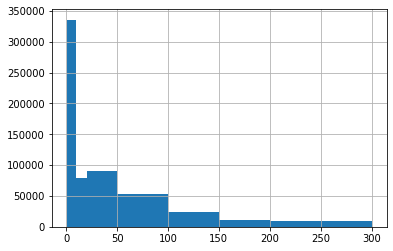

In [22]:
rating_with_totalRatingCount.totalRatingCount.hist(bins=[1,10,20,50,100,150,200,300])

In [23]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,105


In [24]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada|australia|france")]
us_canada_user_rating = us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105,"gilbert, arizona, usa"
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105,"knoxville, tennessee, usa"
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,105,"pittsburgh, pennsylvania, usa"
5,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105,"byron, minnesota, usa"
6,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105,"cordova, tennessee, usa"


In [25]:
from sklearn.metrics.pairwise import csr_matrix

us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute',)
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [26]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors([us_canada_user_rating_pivot.iloc[query_index, :]], n_neighbors = 15)

f={}
for i in range(0, len(distances.flatten())):
    if i == 0:
      print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
      f[us_canada_user_rating_pivot.index[indices.flatten()[i]]] = distances.flatten()[i]
      print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for No Greater Love:

1: Changes, with distance of 0.4716340996133853:
2: Jewels, with distance of 0.4969091355472932:
3: Heartbeat, with distance of 0.573423201123213:
4: Full Circle, with distance of 0.5850807937849627:
5: Message from Nam, with distance of 0.5854282270205484:
6: Thurston House, with distance of 0.5875628850873684:
7: Silent Honor, with distance of 0.5943201479731025:
8: The Long Road Home, with distance of 0.6190303411202703:
9: Wanderlust, with distance of 0.6622161738452843:
10: Twilight's Child (Cutler), with distance of 0.6859168538264666:
11: Dawn (Cutler), with distance of 0.6904605523477572:
12: Palomino, with distance of 0.6936020407201933:
13: Daddy, with distance of 0.6957748952980873:
14: Five Days in Paris, with distance of 0.7025400533597467:


In [27]:
h = books[books.bookTitle.isin(us_canada_user_rating_pivot.index[indices.flatten()][1:])].drop_duplicates("bookTitle")
h['recommendation_metric'] = h.apply(lambda x:f[x.bookTitle],axis=1)
h.sort_values(by="recommendation_metric",ascending=True)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,recommendation_metric
3846,0440111811,Changes,Danielle Steel,1984,Dell,http://images.amazon.com/images/P/0440111811.0...,http://images.amazon.com/images/P/0440111811.0...,http://images.amazon.com/images/P/0440111811.0...,0.472
31390,044021422X,Jewels,Danielle Steel,1993,Dell,http://images.amazon.com/images/P/044021422X.0...,http://images.amazon.com/images/P/044021422X.0...,http://images.amazon.com/images/P/044021422X.0...,0.497
20124,0385299087,Heartbeat,Danielle Steel,1991,Delacorte Press,http://images.amazon.com/images/P/0385299087.0...,http://images.amazon.com/images/P/0385299087.0...,http://images.amazon.com/images/P/0385299087.0...,0.573
22352,0440126894,Full Circle,Danielle Steel,1985,Dell,http://images.amazon.com/images/P/0440126894.0...,http://images.amazon.com/images/P/0440126894.0...,http://images.amazon.com/images/P/0440126894.0...,0.585
17698,0440209412,Message from Nam,Danielle Steel,1991,Dell,http://images.amazon.com/images/P/0440209412.0...,http://images.amazon.com/images/P/0440209412.0...,http://images.amazon.com/images/P/0440209412.0...,0.585
22007,0440185327,Thurston House,Danielle Steel,1984,Dell,http://images.amazon.com/images/P/0440185327.0...,http://images.amazon.com/images/P/0440185327.0...,http://images.amazon.com/images/P/0440185327.0...,0.588
2741,0440224055,Silent Honor,Danielle Steel,1997,Dell,http://images.amazon.com/images/P/0440224055.0...,http://images.amazon.com/images/P/0440224055.0...,http://images.amazon.com/images/P/0440224055.0...,0.594
12386,0385319568,The Long Road Home,DANIELLE STEEL,1998,Delacorte Press,http://images.amazon.com/images/P/0385319568.0...,http://images.amazon.com/images/P/0385319568.0...,http://images.amazon.com/images/P/0385319568.0...,0.619
9263,0440193613,Wanderlust,Danielle Steel,1987,Dell,http://images.amazon.com/images/P/0440193613.0...,http://images.amazon.com/images/P/0440193613.0...,http://images.amazon.com/images/P/0440193613.0...,0.662
5605,0671695142,Twilight's Child (Cutler),V.C. Andrews,1992,Pocket,http://images.amazon.com/images/P/0671695142.0...,http://images.amazon.com/images/P/0671695142.0...,http://images.amazon.com/images/P/0671695142.0...,0.686


# Tensorflow try

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

rating = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
user = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
book = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
book_rating_dataframe = pd.merge(rating, book, on='ISBN')
cols = ['Year-Of-Publication', 'Publisher', 'Book-Author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
book_rating_dataframe.drop(cols, axis=1, inplace=True)


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [29]:
rating_count = (book_rating_dataframe.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'RatingCount_book'})
     [['Book-Title', 'RatingCount_book']]
    )

book = rating_count[rating_count.RatingCount_book == max(rating_count.RatingCount_book)]
print("Maximum Rating on {} with total {} number of counts".format(book['Book-Title'].iloc[0] , book["RatingCount_book"].iloc[0]))
rating_count

Maximum Rating on Wild Animus with total 2502 number of counts


,Book-Title,RatingCount_book
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [30]:
threshold = 25
rating_count = rating_count.query('RatingCount_book >= @threshold')

user_rating = pd.merge(rating_count, book_rating_dataframe, left_on='Book-Title', right_on='Book-Title', how='left')

user_count = (user_rating.
     groupby(by = ['User-ID'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'RatingCount_user'})
     [['User-ID', 'RatingCount_user']]
    )

book = user_count[user_count.RatingCount_user == max(user_count.RatingCount_user)]
print("Maximum Rating on {} with total {} number of counts".format(book['User-ID'].iloc[0] , book["RatingCount_user"].iloc[0]))
user_count

Maximum Rating on 11676 with total 3620 number of counts


,User-ID,RatingCount_user
0,8,2
1,9,2
2,10,1
3,14,1
4,16,2
...,...,...
57123,278846,1
57124,278849,1
57125,278851,6
57126,278852,1


In [31]:
threshold = 20
user_count = user_count.query('RatingCount_user >= @threshold')

combined = user_rating.merge(user_count, left_on = 'User-ID', right_on = 'User-ID', how = 'inner')

print('Number of unique books: ', combined['Book-Title'].nunique())
print('Number of unique users: ', combined['User-ID'].nunique())

Number of unique books:  5850
Number of unique users:  3192


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combined['Book-Rating'] = combined['Book-Rating'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(combined['Book-Rating'].values.reshape(-1,1)))
combined['Book-Rating'] = rating_scaled

In [33]:
combined

,Book-Title,RatingCount_book,User-ID,ISBN,Book-Rating,RatingCount_user
0,'Salem's Lot,47,8936,067103975X,0.000,177
1,1st to Die: A Novel,509,8936,0446610038,0.000,177
2,A Case of Need,236,8936,0451210638,0.000,177
3,A Perfect Stranger,54,8936,0440168724,0.000,177
4,Accident,126,8936,0440217547,0.000,177
...,...,...,...,...,...,...
263462,The World Below (Ballantine Reader's Circle),44,7312,0345440765,0.000,26
263463,Thunderhead,41,7312,0446608378,0.000,26
263464,TickTock,92,7312,034538430X,0.000,26
263465,Time And Again,94,7312,0373484410,0.000,26


In [34]:
combined = combined.drop_duplicates(['User-ID', 'Book-Title'])
user_book_matrix = combined.pivot(index='User-ID', columns='Book-Title', values='Book-Rating')
user_book_matrix.fillna(0, inplace=True)
users = user_book_matrix.index.tolist()
books = user_book_matrix.columns.tolist()
user_book_matrix = user_book_matrix.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [35]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
num_input = combined['Book-Title'].nunique()
num_hidden_1 = 10
num_hidden_2 = 5

X = tf.placeholder(tf.float64, [None,num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1], dtype=tf.float64)),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2], dtype=tf.float64)),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1], dtype=tf.float64)),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input], dtype=tf.float64)),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2], dtype=tf.float64)),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'decoder_b2': tf.Variable(tf.random_normal([num_input], dtype=tf.float64)),
}

In [0]:
def encoder(x):
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights["encoder_h1"]),biases["encoder_b1"]))
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights["encoder_h2"]),biases["encoder_b2"]))
  return layer_2

def decoder(x):
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights["decoder_h1"]),biases["decoder_b1"]))
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights["decoder_h2"]),biases["decoder_b2"]))
  return layer_2

In [0]:
encoder_op = encoder(X)
decoder_out = decoder(encoder_op)

y_pred = decoder_out
y_true = X

In [39]:
loss = tf.losses.mean_squared_error(y_true,y_pred)
optimizer = tf.train.RMSPropOptimizer(0.02).minimize(loss)
eval_x = tf.placeholder(tf.int32,)
eval_y = tf.placeholder(tf.int32,)

pre , pre_out = tf.metrics.precision(labels= eval_x,predictions=eval_y)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [0]:
init = tf.global_variables_initializer()
local_init = tf.local_variables_initializer()
predicted_data = pd.DataFrame()

In [42]:
user_book_matrix_converted = np.array(user_book_matrix)
user_book_matrix_converted.shape

(3192, 5850)

In [43]:
sess = tf.Session()
epochs = 150
batch_size = 35

sess.run(init)
sess.run(local_init)

num_batches = int(user_book_matrix_converted.shape[0] / batch_size)
user_book_matrix_converted = np.array_split(user_book_matrix_converted , num_batches)

for i in range(epochs):
  avg_cost = 0
  for individual_batch in user_book_matrix_converted:
    # print(np.array(individual_batch).shape)
    _,l = sess.run([optimizer,loss],feed_dict={X:individual_batch})
    avg_cost+=l

  avg_cost /= num_batches

  print("Epoch: {} ,Loss: {}".format(i+1,avg_cost)) 


Epoch: 1 ,Loss: 0.3518626237963582
Epoch: 2 ,Loss: 0.30706150436794366
Epoch: 3 ,Loss: 0.09674686666291493
Epoch: 4 ,Loss: 0.004990307061554311
Epoch: 5 ,Loss: 0.0037500491995200677
Epoch: 6 ,Loss: 0.0035805373304206266
Epoch: 7 ,Loss: 0.0032555476115034014
Epoch: 8 ,Loss: 0.0031472900626505467
Epoch: 9 ,Loss: 0.0031216601894881865
Epoch: 10 ,Loss: 0.0031038723312891447
Epoch: 11 ,Loss: 0.003090755970493614
Epoch: 12 ,Loss: 0.003080656317031973
Epoch: 13 ,Loss: 0.0030725542494290316
Epoch: 14 ,Loss: 0.0030650160132119288
Epoch: 15 ,Loss: 0.0029272055381315424
Epoch: 16 ,Loss: 0.002886660239700187
Epoch: 17 ,Loss: 0.00288275164260355
Epoch: 18 ,Loss: 0.00287945027166343
Epoch: 19 ,Loss: 0.002876576180774514
Epoch: 20 ,Loss: 0.0028740173041984277
Epoch: 21 ,Loss: 0.0028716134941103037
Epoch: 22 ,Loss: 0.0028630620390586144
Epoch: 23 ,Loss: 0.00270649826583954
Epoch: 24 ,Loss: 0.0026997271132051617
Epoch: 25 ,Loss: 0.002698167718455687
Epoch: 26 ,Loss: 0.0026968357429563343
Epoch: 27 ,Los

In [0]:
user_book_matrix_converted = np.concatenate(user_book_matrix_converted, axis=0)

In [0]:
preds = sess.run(decoder_out, feed_dict={X: user_book_matrix_converted})
preds = np.array(preds,dtype=str)
predicted_data_ = pd.DataFrame(preds)

In [0]:
predicted_data_ = predicted_data_.stack().reset_index(name='Book-Rating')
predicted_data_.columns = ['User-ID', 'Book-Title', 'Book-Rating']
predicted_data_['User-ID'] = predicted_data_['User-ID'].map(lambda value: users[value])
predicted_data_['Book-Title'] = predicted_data_['Book-Title'].map(lambda value: books[value])

In [47]:
predicted_data_.groupby("User-ID").count().stack()

User-ID             
243      Book-Title     5850
         Book-Rating    5850
254      Book-Title     5850
         Book-Rating    5850
487      Book-Title     5850
                        ... 
278582   Book-Rating    5850
278633   Book-Title     5850
         Book-Rating    5850
278843   Book-Title     5850
         Book-Rating    5850
Length: 6384, dtype: int64

In [100]:
user_id = 243
keys = ['User-ID', 'Book-Title']
index_1 = predicted_data_[predicted_data_['User-ID'] == user_id].set_index(keys).index
index_2 = combined[combined['User-ID'] == user_id].set_index(keys).index

print(index_1.shape,index_2.shape)
usable_indexes = set(index_1).difference(set(index_2))
predicts=predicted_data_[(predicted_data_['User-ID'] == user_id) & predicted_data_['Book-Title'].isin([i[1] for i in usable_indexes])].sort_values(by="Book-Rating",ascending=False).head(20)
predicts["Book-Rating"] = predicts['Book-Rating'].apply(lambda x:"{0:.7f}".format(float(x)))
predicts.sort_values(by="Book-Rating",ascending=False)

(5850,) (68,)


,User-ID,Book-Title,Book-Rating
4302,243,The Da Vinci Code,0.0608676
5060,243,The Secret Life of Bees,0.0477055
1837,243,Harry Potter and the Chamber of Secrets (Book 2),0.0465519
1841,243,Harry Potter and the Prisoner of Azkaban (Book 3),0.0436693
2406,243,Life of Pi,0.0415798
702,243,Bridget Jones's Diary,0.0415436
1843,243,Harry Potter and the Sorcerer's Stone (Harry P...,0.0394455
4984,243,The Red Tent (Bestselling Backlist),0.0388696
5401,243,To Kill a Mockingbird,0.0381117
1839,243,Harry Potter and the Goblet of Fire (Book 4),0.0376612


In [0]:
keys = ['User-ID', 'Book-Title']
index_1 = predicted_data_.set_index(keys).index
index_2 = combined.set_index(keys).index

top_ranked = predicted_data_[~index_1.isin(index_2)]
top_ranked = top_ranked.sort_values(['User-ID', 'Book-Rating'], ascending=[True, False])
top_ranked = top_ranked.groupby('User-ID').head(20)

In [68]:
top_ranked[top_ranked['User-ID'] == 3363]

,User-ID,Book-Title,Book-Rating
161444,3363,Salt: A World History,8.762174754638372e-05
163564,3363,War and Peace (Wordsworth Classics),5.4481050503723195e-05
158551,3363,Blessing in Disguise,5.436960942397198e-05
162859,3363,The Phantom of the Opera: The Original Novel,2.837837734935499e-05
163010,3363,The Secret Life of Bees,0.04769790445969215
159787,3363,Harry Potter and the Chamber of Secrets (Book 2),0.04651550375934195
159791,3363,Harry Potter and the Prisoner of Azkaban (Book 3),0.043661567275720514
160356,3363,Life of Pi,0.04158829897224542
159793,3363,Harry Potter and the Sorcerer's Stone (Harry P...,0.03935222924055055
162934,3363,The Red Tent (Bestselling Backlist),0.03886915131250633


In [0]:
top_ranked.info()

In [110]:
book_df = pd.read_csv("BX-Books.csv",encoding="latin-1",sep=";",error_bad_lines=False,skip_blank_lines=True)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [87]:
top_ranked[top_ranked["User-ID"] == 11676]

,User-ID,Book-Title,Book-Rating
623594,11676,Salt: A World History,8.770141110470709e-05
620701,11676,Blessing in Disguise,5.450145263184445e-05
625714,11676,War and Peace (Wordsworth Classics),5.4325859534024155e-05
625009,11676,The Phantom of the Opera: The Original Novel,2.8369953315914378e-05
624658,11676,"The Gunslinger (The Dark Tower, Book 1)",0.01577059240675153
624466,11676,"The Drawing of the Three (The Dark Tower, Book 2)",0.015391402093504543
625241,11676,"The Subtle Knife (His Dark Materials, Book 2)",0.015233366391713892
624407,11676,The Dark Half,0.014155767631679925
621835,11676,"Girl, Interrupted",0.013257784096397184
624829,11676,The Little Prince,0.012766611511834832


In [0]:
temp = top_ranked[top_ranked['User-ID'] == 243].merge(book_df)
temp = temp.reset_index().drop(["index","User-ID"],axis=1).reset_index()
temp = temp.drop_duplicates("Book-Title")
# temp=temp.rename(columns = {"index":"id",
#                   "Book-Title":"Title",
#                   "Book-Rating":"Rating",
#                   "Book-Author":"Author",
#                   "Year-Of-Publication":"published_in",
#                   "Image-URL-S" :"image_s",
#                   "Image-URL-M" :"image_m",
#                   "Image-URL-L" :"image_l",
#                   })
temp

,index,Book-Title,Book-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0,Carter Beats the Devil,9.499436684128026e-05,0786886323,Glen Gold,2002,Hyperion,http://images.amazon.com/images/P/0786886323.0...,http://images.amazon.com/images/P/0786886323.0...,http://images.amazon.com/images/P/0786886323.0...
3,3,By the Sword (Kerowyn's Tale),9.419164512540417e-05,0886774632,Mercedes Lackey,1991,Daw Books,http://images.amazon.com/images/P/0886774632.0...,http://images.amazon.com/images/P/0886774632.0...,http://images.amazon.com/images/P/0886774632.0...
4,4,Someone Like You,8.663302353764591e-05,0449150062,Elaine Coffman,1998,Ivy Books,http://images.amazon.com/images/P/0449150062.0...,http://images.amazon.com/images/P/0449150062.0...,http://images.amazon.com/images/P/0449150062.0...
11,11,What We Keep : A Novel (Ballantine Reader's Ci...,7.404989165678294e-05,0345423291,Elizabeth Berg,1999,Ballantine Books,http://images.amazon.com/images/P/0345423291.0...,http://images.amazon.com/images/P/0345423291.0...,http://images.amazon.com/images/P/0345423291.0...
12,12,Death by Darjeeling (Tea Shop Mysteries),4.243822778610553e-05,0425179451,Laura Childs,2001,Berkley Publishing Group,http://images.amazon.com/images/P/0425179451.0...,http://images.amazon.com/images/P/0425179451.0...,http://images.amazon.com/images/P/0425179451.0...
13,13,Blue Mars,3.700674506618443e-05,0553573357,Kim Stanley Robinson,1997,Spectra Books,http://images.amazon.com/images/P/0553573357.0...,http://images.amazon.com/images/P/0553573357.0...,http://images.amazon.com/images/P/0553573357.0...
14,14,The Da Vinci Code,0.06187894768332087,0385504209,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
20,20,The Secret Life of Bees,0.04806502104828866,0142001740,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
26,26,Harry Potter and the Chamber of Secrets (Book 2),0.046674883448752626,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
29,29,Harry Potter and the Prisoner of Azkaban (Book 3),0.04357327832072581,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...


In [0]:
# temp.to_json(orient="records")

In [0]:
recommendations

,pearsonR,ratingCount
ISBN,,
0316666343,1.000,1295
0446672211,0.411,585
0312291639,0.391,354
0446610038,0.361,391
0060930535,0.349,494
0316601950,0.336,568
0345342968,0.322,321
0385265700,0.315,319
0060934417,0.282,350


In [0]:
book = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [0]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [0]:
!pip install Goodreads
from goodreads import client
gc = client.GoodreadsClient("I8RMWKdI2Mt36VkvbmhvQ","yA9Jemwi5HhIeCtbqmkAQ7GDViPsTc9IFa7lBQQ5o")

In [0]:
test = top_ranked.merge(book,on="Book-Title")
test[test["User-ID"] == 243].drop_duplicates(["Book-Title","ISBN"])
# .drop_duplicates(["Book-Title"])

In [0]:
top_ranked.drop_duplicates("Book-Title").shape

In [0]:
not_counted = []
from bs4 import BeautifulSoup as bs
def get_description(x):
  try:
    desc = gc.book(isbn = str(x))
    # return (bs(desc.description).text)
    details = {
        "rating_dist" : desc.rating_dist,
        "reviews" : desc.text_reviews_count,
        "description": desc.description,
        "pages":desc.num_pages,
        "popular_shelves": set(["fiction","romance","business","horror","biography","fantasy", "poetry"]).intersection(set([str(i).lower() for i  in desc.popular_shelves])),
        "format":desc.format
    }

    return details
  except Exception as e:
    return desc
    not_counted.append(x)
    
print(temp.ISBN[0])
import json
pd.DataFrame(get_description("0142001430"))
# print(l)
# get_description("0142001430")

In [0]:
# desc = gc.book(isbn = "0452282152")
desc = gc.book(isbn = "0452282152")
details = {
    "rating_dist" : desc.rating_dist,
    "reviews" : desc.text_reviews_count,
    "description": desc.description,
    "pages":desc.num_pages,
    "popular_shelves": set(["fiction","romance","business","horror","biography","fantasy", "self help"]).intersection(set([str(i).lower() for i  in desc.popular_shelves])),
    "format":desc.format
}

In [0]:
details

In [0]:
# temp[["description","Genres"]] = 
def get_details(x):
  try:
    book = gc.book(isbn=str(x))
  except Exception as e:
    return False
  try:
    description = book.description
  except Exception as e:
    description = "No Description"
  try:
    genres = set(["fiction","romance","business","horror","biography","fantasy", "self help"]).intersection(set([str(i).lower() for i  in book.popular_shelves]))
  except Exception as e:  
    genres = "No Genre Provided"
  try:
    ratings = book.rating_dist
  except Exception as e:
    ratings = "No ratings Provided"
    
  return [description,genres,ratings]

In [0]:
from collections import defaultdict
details_dict = defaultdict(list)

from tqdm import tqdm
for i in tqdm(book['ISBN'][:1000]):
  details_dict[str(i)] = get_description(i)

In [0]:
temp_["Description"] = tmep_.apply(lambda x:)

Another Try

In [0]:
!wget https://raw.githubusercontent.com/MengtingWan/goodreads/master/gdrive_id.csv

In [0]:
import pandas as pd

gdrive  = pd.read_csv("gdrive_id.csv")

In [0]:
!pip install gdown

In [0]:
import gdown
from tqdm import tqdm
def download_by_name(fid, output=None, quiet=False):
    if fname in tqdm(file_id_map):
        url = 'https://drive.google.com/uc?id='+file_id_map[fname]
        gdown.download(url, output=output, quiet=quiet)
    else:
        print('The file', fname, 'can not be found!')

### DATA WORK

In [0]:
one = pd.read_csv("data_1.csv")
two = pd.read_csv("data_2.csv")

data = pd.concat([one,two])

In [111]:
books_df = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [0]:
final = books_df.merge(data).dropna()

In [120]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21696 entries, 0 to 29998
Data columns (total 14 columns):
ISBN                   21696 non-null object
Book-Title             21696 non-null object
Book-Author            21696 non-null object
Year-Of-Publication    21696 non-null object
Publisher              21696 non-null object
Image-URL-S            21696 non-null object
Image-URL-M            21696 non-null object
Image-URL-L            21696 non-null object
rating_dist            21696 non-null object
reviews                21696 non-null float64
description            21696 non-null object
pages                  21696 non-null float64
popular_shelves        21696 non-null object
format                 21696 non-null object
dtypes: float64(2), object(12)
memory usage: 2.5+ MB


In [121]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-02-15 22:17:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-02-15 22:17:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-02-15 22:17:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [122]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
glove = open("glove.6B.100d.txt","r").read().split("\n")

In [203]:
from collections import defaultdict
from tqdm import tqdm
glove_dict = defaultdict()
for i in tqdm(glove):
  sp = i.split(" ")
  key,values = sp[0],sp[1:]
  glove_dict[key] = [float(j) for j in values]

100%|██████████| 400001/400001 [00:13<00:00, 29194.06it/s]


In [204]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
Stopwords = stopwords.words("english")
# ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [287]:
import re
from bs4 import BeautifulSoup as bs

def remove_discrepancies(m):
  out = m
  if re.search("[=\'\"*0-9]",m):
    out = re.sub("[=\'\"*0-9]","",m)
  out = bs(out).text
  return out


def get_vector(x):
  x = remove_discrepancies(x)
  words = word_tokenize(str(x))
  words = [i for i in words if not i in Stopwords]
  vector =  np.zeros(100,dtype=float)
  for i in words:
    if i.lower() in  glove_dict and i.isalpha():
      # print(i)
      arr = np.array(glove_dict[i.lower()])
      if not arr.shape[0] == 0:
        vector = arr + vector
  # return np.mean(vector,axis=1)
  return vector

for i in range(len(final["description"])):
  try:
    get_vector(final["description"].iloc[i])
  except Exception as e:
    print(i)
    print(e)
    break

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
